In [4]:
import pickle
import numpy as np
import torch
import random
from matplotlib import pyplot as plt

from lstm_data_prep import prep
from rnn_perm_test import iterateSeq, test_random_labels, test_random_column_labels, test_random_features
from attention import test_model, initialize_encoder_decoder

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
with open('HCP_movie_watching.pkl','rb') as f:
    TS = pickle.load(f)

input_size = 300
hidden_size = 32
n_layers = 1
seq_len = 90
class_num = 15

_, test_loader = prep(TS)

In [ ]:
encoder, attent, decoder, encoder_optimizer, decoder_optimizer, loss_fn = initialize_encoder_decoder(input_size, hidden_size, class_num)

check = torch.load("encoder-decoder.pt")
encoder.load_state_dict(check["encoder"])
decoder.load_state_dict(check["decoder"])

encoder.eval()
decoder.eval()

attention_accuracy = test_model(encoder, decoder, test_loader, seq_len, loss_fn)
attention_accuracy = np.insert(attention_accuracy, 0, attention_accuracy[0])
print(test_loss)

c:\Users\Anna&Megan\Documents\GitHub\srp-lab-notebook\hcp_data\attention.py:187: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  decoder_input = torch.tensor(new_input, device=device)
c:\Users\Anna&Megan\Documents\GitHub\srp-lab-notebook\hcp_data\attention.py:189: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_loss += loss_fn(decoder_output.view(curr_batch_size,-1), torch.tensor(y[:, j, :], device=device)).item()


UnboundLocalError: local variable 'output' referenced before assignment

In [ ]:
test_permutation_acc, _ = iterateSeq(encoder, decoder, loss_fn, TS, numSamples = 1)
random_feature_acc, _ = test_random_features(encoder, decoder, loss_fn, TS, numSamples = 1)

In [ ]:
# Test with random labels
# random_labels_samples_accuracy, l_loss = test_random_labels(encoder, decoder, loss_fn, TS)

In [ ]:
random_batch_labels_accuracy, _ = test_random_column_labels(encoder, decoder, loss_fn, TS, numSamples = 1)

c:\Users\Anna&Megan\Documents\GitHub\srp-lab-notebook\hcp_data\lstm_data_prep.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_padded = paddingArr(np.array(X_arr))
c:\Users\Anna&Megan\Documents\GitHub\srp-lab-notebook\hcp_data\attention.py:178: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  decoder_input = torch.tensor(y[:, 0, :], device=device)
c:\Users\Anna&Megan\Documents\GitHub\srp-lab-notebook\hcp_data\attention.py:189: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTenso

ValueError: x and y must have same first dimension, but have shapes (90,) and (89,)

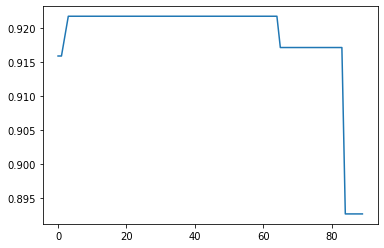

In [ ]:
# Compare accuracies
xAx = [i for i in range(0,90)]
plt.plot(xAx, attention_accuracy, label="attention-encoder-decoder")
# plt.plot(xAx, attention_permutation_accuracy, label="permutation")
"""
# Test with randomly generated label for each (batch, time step)
for i, plot in enumerate(random_labels_samples_accuracy):
    plot = np.insert(plot, 0, plot[0])
    plt.plot(xAx, plot, label="random-" + str(i+1))
"""

# Test with randomly generated label for each batch, same across time steps within batch
for i, plot in enumerate(random_batch_labels_accuracy):
    plt.plot(xAx, plot, label="random-labels-" + str(i+1))

# Test with permuted inputs
for i, plot in enumerate(test_permutation_acc):
    plt.plot(xAx, plot, label="permutation-" + str(i+1))

# Test with randomly generated inputs
for i, plot in enumerate(random_feature_acc):
    plot = np.insert (plot, 0, plot[0])
    plt.plot(xAx, plot, label="")
plt.xlabel("Time (s)")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.xlim(0,90)
plt.title("Time-varying Classification Accuracy")
plt.legend()
plt.show()

In [ ]:
%store attention_accuracy

Stored 'attention_accuracy' (ndarray)
